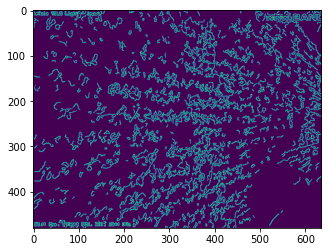

In [2]:
''' 
dans ce programme, nous allons utilisé le module cv2 OpenCV dedié au signal processing
on commence par importer l'image , ensuite, on converti l'image en noir  et blanc, on applique un filtre gaussian
pour diminuer les bruits de l'image, après on utilise un filtre de Canny filtre passe haut pour améliorer les contours
et créer le masque binaire
'''
import cv2

#Importation de l'image
img = cv2.imread('D:/Test/files_for_test_pratique/salads.png', cv2.IMREAD_UNCHANGED)

# Convertion de l'image en noir et blanc
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Application du filtre gaussien
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

#Application de filtre de Canny pour mieux voir les contours
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

# importer le module matplotlib pour l'affichage 
import matplotlib.pyplot as plt

#enfin on peut afficher et voir l'image
plt.imshow(edges)


In [ ]:
'''Ce programme avait juste comme objectif de récuperer des positions précises de l'images qui font les segments des lignes
parallèles des salades
'''
import urllib
import cv2
from win32api import GetSystemMetrics

#the [x, y] for each right-click event will be stored here
right_clicks = list()

#this function will be called whenever the mouse is right-clicked
def mouse_callback(event, x, y, flags, params):

    #right-click event value is 2
    if event == 2:
        global right_clicks

        #store the coordinates of the right-click event
        right_clicks.append([x, y])

        #this just verifies that the mouse data is being collected
        #you probably want to remove this later
        print (right_clicks)
        

img = cv2.imread('D:/Test/files_for_test_pratique/salads.png', cv2.IMREAD_UNCHANGED)
scale_width = 640 / img.shape[1]
scale_height = 480 / img.shape[0]
scale = min(scale_width, scale_height)
window_width = int(img.shape[1] * scale)
window_height = int(img.shape[0] * scale)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', window_width, window_height)

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# le module numpy à importer 
import numpy as np

#nous avons définir les coordonnées d'entrées et les coordonnées de sorties, afin de faire ce qu'on appelle perspective de l'image
#c'est comme on garde une partie de l'image et on zoom l'autre coté 
input_pts = np.float32([[4, 12], [627, 212], [5, 418], [627, 283]])
output_pts = np.float32([[4,12],[627,12],[5,418],[627,418]])

# Calcul de la matrice de transformation 
M = cv2.getPerspectiveTransform(input_pts,output_pts)

# On applique l'image à la sortie 
out = cv2.warpPerspective(img,M,(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)

#Et voilà le resultat
plt.imshow(out)

In [5]:
'''
Cet algorithme a comme but de générer un Dataset en combinant des images d'une manière aléatoire
'''

#On commence par importer tous les libraries qu'on a besoin
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import cv2

#Ensuite, on ouvre les deux images, background et l'image object

background = Image.open('D:/Test/files_for_test_pratique/background.png')
objet =  Image.open('D:/Testfiles_for_test_pratique/object.png')

ii = 0

#j'ai pis 1000 comme taille
while(ii < 1000):
    #génrer une valeur aléatoire entre 0 et 4 pour voir le nombre de fois qu' on va mettre l'objet dans l'arrière plan
    
    nombre = random.randint(0,4)

    for item in range(nombre):
        #Gén"ration des coordonnées de positions aléatoires
        x = random.randint(0,300)
        y = random.randint(0,300)
        
        #angle de la rotation de l'image aléatoire aussi
        rotation = random.randint(0,180)
        
        #On mets les images obtenues dans l'image d'origine 

        background.paste(background, (x, y))
    ii = ii + 1
    
    # Enregistrement avec la notation COCOii ou ii est un nombre qui s'incremente, 
    # n'oublies pas de préciser le chemin en fonction de votre PC et de vos repertoires 
    im1 = background.save("D:/Test/files_for_test_pratique/Dataset/COCO" + str(ii) + ".png")
    
